# Kerr spacetime

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr) (version 0.9.1) in computations regarding Kerr spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_Kerr.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots (use `'jmol'` for interactive 3D graphics):

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

Since some computations are quite long, we ask for running them in parallel on 8 cores:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr spacetime as a 4-dimensional diffentiable manifold:

In [4]:
M = Manifold(4, 'M', r'\mathcal{M}')
print(M)

4-dimensional differentiable manifold M


Let us use the standard **Boyer-Lindquist coordinates** on it, by first introducing the part $\mathcal{M}_0$ covered by these coordinates and then declaring a chart `BL` (for *Boyer-Lindquist*) on $\mathcal{M}_0$, via the method `chart()`, the argument of which is a string expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [5]:
M0 = M.open_subset('M0', r'\mathcal{M}_0')
BL.<t,r,th,ph> = M0.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi') 
print(BL) ; BL

Chart (M0, (t, r, th, ph))


Chart (M0, (t, r, th, ph))

In [6]:
BL[0], BL[1]

(t, r)

<h2>Metric tensor</h2>

<p>The 2 parameters $m$ and $a$ of the Kerr spacetime are declared as symbolic variables:</p>

In [7]:
var('m, a', domain='real')

(m, a)

<p>Let us introduce the spacetime metric:</p>

In [8]:
g = M.lorentzian_metric('g')

<p>The metric is set by its components in the coordinate frame associated with Boyer-Lindquist coordinates, which is the current manifold's default frame:</p>

In [9]:
rho2 = r^2 + (a*cos(th))^2
Delta = r^2 -2*m*r + a^2
g[0,0] = -(1-2*m*r/rho2)
g[0,3] = -2*a*m*r*sin(th)^2/rho2
g[1,1], g[2,2] = rho2/Delta, rho2
g[3,3] = (r^2+a^2+2*m*r*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(a^2*cos(th)^2 + r^2) - 1) dt*dt - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 - 2*m*r + r^2) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2 dph*dph

<p>A matrix view of the components with respect to the manifold's default vector frame:</p>

In [10]:
g[:]

[                                  2*m*r/(a^2*cos(th)^2 + r^2) - 1                                                                 0                                                                 0                          -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2)]
[                                                                0                         (a^2*cos(th)^2 + r^2)/(a^2 - 2*m*r + r^2)                                                                 0                                                                 0]
[                                                                0                                                                 0                                               a^2*cos(th)^2 + r^2                                                                 0]
[                         -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2)                                                                 0                                                                 0 (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2]

<p>The list of the non-vanishing components:</p>

In [11]:
g.display_comp()

g_t,t = 2*m*r/(a^2*cos(th)^2 + r^2) - 1 
g_t,ph = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_r,r = (a^2*cos(th)^2 + r^2)/(a^2 - 2*m*r + r^2) 
g_th,th = a^2*cos(th)^2 + r^2 
g_ph,t = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_ph,ph = (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2

<h2>Levi-Civita Connection</h2>

<p>The Levi-Civita connection $\nabla$ associated with $g$:</p>

In [12]:
nabla = g.connection() ; print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


<p>Let us verify that the covariant derivative of $g$ with respect to $\nabla$ vanishes identically:</p>

In [13]:
nabla(g) == 0

True

<p>Another view of the above property:</p>

In [14]:
nabla(g).display()

nabla_g(g) = 0

<p>The nonzero Christoffel symbols (skipping those that can be deduced by symmetry of the last two indices):</p>

In [15]:
g.christoffel_symbols_display()

Gam^t_t,r = (a^2*m*r^2 + m*r^4 - (a^4*m + a^2*m*r^2)*cos(th)^2)/(a^2*r^4 - 2*m*r^5 + r^6 + (a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^2) 
Gam^t_t,th = -2*a^2*m*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_r,ph = -(a^3*m*r^2 + 3*a*m*r^4 - (a^5*m - a^3*m*r^2)*cos(th)^2)*sin(th)^2/(a^2*r^4 - 2*m*r^5 + r^6 + (a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^2) 
Gam^t_th,ph = -2*(a^5*m*r*cos(th)*sin(th)^5 - (a^5*m*r + a^3*m*r^3)*cos(th)*sin(th)^3)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,t = (a^2*m*r^2 - 2*m^2*r^3 + m*r^4 - (a^4*m - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,ph = -(a^3*m*r^2 - 2*a*m^2*r^3 + a*m*r^4 - (a^5*m - 2*a^3*m^2*r + a^3*m*r^2)*cos(th)^2)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_r,r = (a^2*r - m*r^2 + (a^2*m - a^2*r)*cos(th)^2)/(a^2*r^2 - 2*m*r^3 + r^4 + (a^4 - 2*a^2*m*r + a^2*r^2)*cos(th)^2) 
Gam^r_r,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^r_th,th = -(a^2*r - 2*m*r^2 + r^3)/(a^2*cos(th)^2 + r^2) 
Gam^r_ph,ph = ((a^4*m*r^2 - 2*a^2*m^2*r^3 + a^2*m*r^4 - (a^6*m - 2*a^4*m^2*r + a^4*m*r^2)*cos(th)^2)*sin(th)^4 - (a^2*r^5 - 2*m*r^6 + r^7 + (a^6*r - 2*a^4*m*r^2 + a^4*r^3)*cos(th)^4 + 2*(a^4*r^3 - 2*a^2*m*r^4 + a^2*r^5)*cos(th)^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,t = -2*a^2*m*r*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,ph = 2*(a^3*m*r + a*m*r^3)*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_r,r = a^2*cos(th)*sin(th)/(a^2*r^2 - 2*m*r^3 + r^4 + (a^4 - 2*a^2*m*r + a^2*r^2)*cos(th)^2) 
Gam^th_r,th = r/(a^2*cos(th)^2 + r^2) 
Gam^th_th,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^th_ph,ph = -((a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^5 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^3 + (2*a^4*m*r + 4*a^2*m*r^3 + a^2*r^4 + r^6)*cos(th))*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,r = -(a^3*m*cos(th)^2 - a*m*r^2)/(a^2*r^4 - 2*m*r^5 + r^6 + (a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^2) 
Gam^ph_t,th = -2*a*m*r*cos(th)/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th)) 
Gam^ph_r,ph = -(a^2*m*r^2 + 2*m*r^4 - r^5 + (a^4*m - a^4*r)*cos(th)^4 - (a^4*m - a^2*m*r^2 + 2*a^2*r^3)*cos(th)^2)/(a^2*r^4 - 2*m*r^5 + r^6 + (a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^2) 
Gam^ph_th,ph = (a^4*cos(th)*sin(th)^4 - 2*(a^4 - a^2*m*r + a^2*r^2)*cos(th)*sin(th)^2 + (a^4 + 2*a^2*r^2 + r^4)*cos(th))/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th))

<h2>Killing vectors</h2>
<p>The default vector frame on the spacetime manifold is the coordinate basis associated with Boyer-Lindquist coordinates:</p>

In [16]:
M.default_frame() is BL.frame()

True

In [17]:
BL.frame()

Coordinate frame (M0, (d/dt,d/dr,d/dth,d/dph))

<p>Let us consider the first vector field of this frame:</p>

In [18]:
xi = BL.frame()[0] ; xi

Vector field d/dt on the Open subset M0 of the 4-dimensional differentiable manifold M

In [19]:
print(xi)

Vector field d/dt on the Open subset M0 of the 4-dimensional differentiable manifold M


<p>The 1-form associated to it by metric duality is</p>

In [20]:
xi_form = xi.down(g) ; xi_form.display()

-(a^2*cos(th)^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) dt - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph

<p>Its covariant derivative is</p>

In [21]:
nab_xi = nabla(xi_form) ; print(nab_xi) ; nab_xi.display()

Tensor field of type (0,2) on the Open subset M0 of the 4-dimensional differentiable manifold M


(a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt*dr + 2*a^2*m*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt*dth - (a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dr*dt + (a^3*m*cos(th)^2 - a*m*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dr*dph - 2*a^2*m*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth*dt + 2*(a^3*m*r + a*m*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth*dph - (a^3*m*cos(th)^2 - a*m*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dph*dr - 2*(a^3*m*r + a*m*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dph*dth

<p>Let us check that the Killing equation is satisfied:</p>

In [22]:
nab_xi.symmetrize() == 0

True

<p>Similarly, let us check that $\frac{\partial}{\partial\phi}$ is a Killing vector:</p>

In [23]:
chi = BL.frame()[3] ; chi

Vector field d/dph on the Open subset M0 of the 4-dimensional differentiable manifold M

In [24]:
nabla(chi.down(g)).symmetrize() == 0

True

<h2>Curvature</h2>

<p>The Ricci tensor associated with $g$:</p>

In [25]:
Ric = g.ricci() ; print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


<p>Let us check that the Kerr metric is a solution of the vacuum Einstein equation:</p>

In [26]:
Ric == 0

True

<p>Another view of the above property:</p>

In [27]:
Ric.display()

Ric(g) = 0

<p>The Riemann curvature tensor associated with $g$:</p>

In [28]:
R = g.riemann() ; print(R)

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


<p>Contrary to the Ricci tensor, the Riemann tensor does not vanish; for instance, the component $R^0_{\ \, 123}$ is</p>

In [29]:
R[0,1,2,3]

-((a^7*m - 2*a^5*m^2*r + a^5*m*r^2)*cos(th)*sin(th)^5 + (a^7*m + 2*a^5*m^2*r + 6*a^5*m*r^2 - 6*a^3*m^2*r^3 + 5*a^3*m*r^4)*cos(th)*sin(th)^3 - 2*(a^7*m - a^5*m*r^2 - 5*a^3*m*r^4 - 3*a*m*r^6)*cos(th)*sin(th))/(a^2*r^6 - 2*m*r^7 + r^8 + (a^8 - 2*a^6*m*r + a^6*r^2)*cos(th)^6 + 3*(a^6*r^2 - 2*a^4*m*r^3 + a^4*r^4)*cos(th)^4 + 3*(a^4*r^4 - 2*a^2*m*r^5 + a^2*r^6)*cos(th)^2)

<h3>Bianchi identity</h3>

<p>Let us check the Bianchi identity $\nabla_p R^i_{\ \, j kl} + \nabla_k R^i_{\ \, jlp} + \nabla_l R^i_{\ \, jpk} = 0$:</p>

In [30]:
DR = nabla(R) ; print(DR)  #long (takes a while)

Tensor field nabla_g(Riem(g)) of type (1,4) on the 4-dimensional differentiable manifold M


In [31]:
for i in M.irange():
    for j in M.irange():
        for k in M.irange():
            for l in M.irange():
                for p in M.irange():
                    print DR[i,j,k,l,p] + DR[i,j,l,p,k] + DR[i,j,p,k,l] ,

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<p>If the last sign in the Bianchi identity is changed to minus, the identity does no longer hold:</p>

In [32]:
DR[0,1,2,3,1] + DR[0,1,3,1,2] + DR[0,1,1,2,3] # should be zero (Bianchi identity)

0

In [33]:
DR[0,1,2,3,1] + DR[0,1,3,1,2] - DR[0,1,1,2,3] # note the change of the second + to -

24*((a^5*m*r + a^3*m*r^3)*cos(th)*sin(th)^3 - (a^5*m*r - a*m*r^5)*cos(th)*sin(th))/(a^2*r^6 - 2*m*r^7 + r^8 + (a^8 - 2*a^6*m*r + a^6*r^2)*cos(th)^6 + 3*(a^6*r^2 - 2*a^4*m*r^3 + a^4*r^4)*cos(th)^4 + 3*(a^4*r^4 - 2*a^2*m*r^5 + a^2*r^6)*cos(th)^2)

### Kretschmann scalar

The tensor $R^\flat$, of components $R_{abcd} = g_{am} R^m_{\ \, bcd}$:

In [34]:
dR = R.down(g) ; print(dR)

Tensor field of type (0,4) on the 4-dimensional differentiable manifold M


The tensor $R^\sharp$, of components $R^{abcd} = g^{bp} g^{cq} g^{dr} R^a_{\ \, pqr}$:

In [35]:
uR = R.up(g) ; print(uR)

Tensor field of type (4,0) on the 4-dimensional differentiable manifold M


The Kretschmann scalar $K := R^{abcd} R_{abcd}$:

In [36]:
Kr_scalar = uR['^{abcd}']*dR['_{abcd}']
Kr_scalar.display()

M --> R
on M0: (t, r, th, ph) |--> -48*(a^6*m^2*cos(th)^6 - 15*a^4*m^2*r^2*cos(th)^4 + 15*a^2*m^2*r^4*cos(th)^2 - m^2*r^6)/(a^12*cos(th)^12 + 6*a^10*r^2*cos(th)^10 + 15*a^8*r^4*cos(th)^8 + 20*a^6*r^6*cos(th)^6 + 15*a^4*r^8*cos(th)^4 + 6*a^2*r^10*cos(th)^2 + r^12)

<p>A variant of this expression can be obtained by invoking the<span style="font-family: courier new,courier;"> factor()</span> method on the coordinate function representing the scalar field in the manifold's default chart:</p>

In [37]:
Kr = Kr_scalar.coord_function()
Kr.factor()

-48*(a^2*cos(th)^2 + 4*a*r*cos(th) + r^2)*(a^2*cos(th)^2 - 4*a*r*cos(th) + r^2)*(a*cos(th) + r)*(a*cos(th) - r)*m^2/(a^2*cos(th)^2 + r^2)^6

<p>As a check, we can compare Kr to the formula given by R. Conn Henry, <a href="http://iopscience.iop.org/0004-637X/535/1/350/fulltext/">Astrophys. J. <strong>535</strong>, 350 (2000)</a>:</p>

In [38]:
Kr == 48*m^2*(r^6 - 15*r^4*(a*cos(th))^2 + 15*r^2*(a*cos(th))^4 
              - (a*cos(th))^6) / (r^2+(a*cos(th))^2)^6

True

<p>The Schwarzschild value of the Kretschmann scalar is recovered by setting $a=0$:</p>

In [39]:
Kr.expr().subs(a=0)

48*m^2/r^6

<p>Let us plot the Kretschmann scalar for $m=1$ and  $a=0.9$:</p>

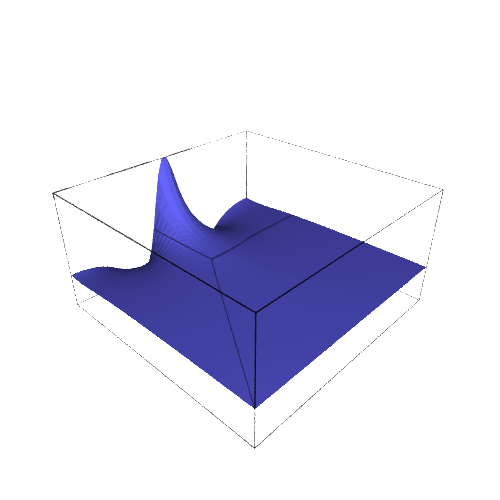

In [40]:
K1 = Kr.expr().subs(m=1, a=0.9)
plot3d(K1, (r,1,3), (th, 0, pi), viewer=viewer3D)